Clustering Homework
Sirawish Thawinthai 6030826721

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt

In [4]:
firedata = pd.read_csv('/Users/folkst/Desktop/Fire_Data.csv')

In [5]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,4/4/2020 00:00,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,4/4/2020 00:00,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,4/4/2020 00:00,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,4/4/2020 00:00,2003,N,VIIRS,n,1,292.7,2.9,0


In [6]:
#คอลัมน์ใหม่ใช้สร้าง datetime
firedata['NEWTIME'] = firedata['ACQ_TIME']

In [7]:
#เติม 0 ให้เวลาที่มีไม่ครบ 4 หลัก ex 06:35
firedata['NEWTIME'] = firedata['NEWTIME'].astype(str).str.zfill(4)

In [8]:
#เติม :
firedata['NEWTIME'] = firedata['NEWTIME'].str.slice(stop=2)+':'+firedata['NEWTIME'].str.slice(start=2)

In [9]:
#เชื่อมวันและเวลา
firedata['NEWTIME'] = pd.to_datetime(firedata['ACQ_DATE'].astype(str)+' '+firedata['NEWTIME'])

In [10]:
firedata.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE              object
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
NEWTIME       datetime64[ns]
dtype: object

In [11]:
#เชื่อมวันเวลาแล้ว
firedata['NEWTIME']

0       2019-01-12 06:35:00
1       2019-01-12 06:35:00
2       2019-01-12 06:35:00
3       2019-01-12 06:35:00
4       2019-01-12 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: NEWTIME, Length: 79234, dtype: datetime64[ns]

In [12]:
#ค่าต่างเวลาไว้พล็อตกราฟ
firedata['dif'] = firedata['NEWTIME'] - firedata['NEWTIME'].iloc[0]
firedata['datetime_numeric'] = (firedata['dif'].dt.total_seconds())/86400

In [13]:
#นับเฉพาะ 7 วัน
firedata.head(717)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,NEWTIME,dif,datetime_numeric
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,303.4,5.8,0,2019-01-12 06:35:00,0 days 00:00:00,0.000000
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,306.3,6.4,0,2019-01-12 06:35:00,0 days 00:00:00,0.000000
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,305.0,3.8,0,2019-01-12 06:35:00,0 days 00:00:00,0.000000
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,306.0,4.6,0,2019-01-12 06:35:00,0 days 00:00:00,0.000000
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,303.9,3.1,0,2019-01-12 06:35:00,0 days 00:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,713,17.07450,98.38679,296.0,0.41,0.37,7/12/2019 00:00,1854,N,VIIRS,n,1,282.8,0.3,0,2019-07-12 18:54:00,181 days 12:19:00,181.513194
713,714,17.40994,99.13846,295.9,0.39,0.36,7/12/2019 00:00,1854,N,VIIRS,n,1,283.6,0.3,0,2019-07-12 18:54:00,181 days 12:19:00,181.513194
714,715,16.40887,98.64652,313.0,0.40,0.37,7/12/2019 00:00,1854,N,VIIRS,n,1,282.3,1.3,0,2019-07-12 18:54:00,181 days 12:19:00,181.513194
715,716,18.47282,99.13702,298.0,0.40,0.37,7/12/2019 00:00,1854,N,VIIRS,n,1,284.7,0.6,0,2019-07-12 18:54:00,181 days 12:19:00,181.513194


In [14]:
days7 = firedata[["LATITUDE","LONGITUDE","datetime_numeric"]].head(717)

In [15]:
days7

,LATITUDE,LONGITUDE,datetime_numeric
0,16.33696,98.70137,0.000000
1,16.48906,98.73961,0.000000
2,16.93571,99.06874,0.000000
3,16.54092,98.59869,0.000000
4,16.87473,98.63222,0.000000
...,...,...,...
712,17.07450,98.38679,181.513194
713,17.40994,99.13846,181.513194
714,16.40887,98.64652,181.513194
715,18.47282,99.13702,181.513194


In [ ]:
###########ทำ array แต่ละ column#############

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

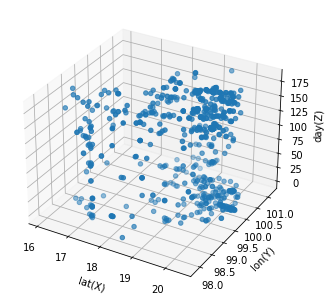

In [18]:
#พล็อตกราฟ ละติจูด ลองจิจูด ค่าต่างเวลา
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
a = Axes3D(fig)
a.scatter(days7['LATITUDE'], days7['LONGITUDE'], days7['datetime_numeric'])
a.set_xlabel('lat(X)')
a.set_ylabel('lon(Y)')
a.set_zlabel('day(Z)')
plt.show()

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [53]:
lat7 = np.array(days7.values.tolist())
lat7

array([[ 16.33696   ,  98.70137   ,   0.        ],
       [ 16.48906   ,  98.73961   ,   0.        ],
       [ 16.93571   ,  99.06874   ,   0.        ],
       ...,
       [ 16.40887   ,  98.64652   , 181.51319444],
       [ 18.47282   ,  99.13702   , 181.51319444],
       [ 18.69487   ,  98.34657   , 181.51319444]])

In [180]:
db = DBSCAN(eps=1, min_samples=20).fit(lat7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

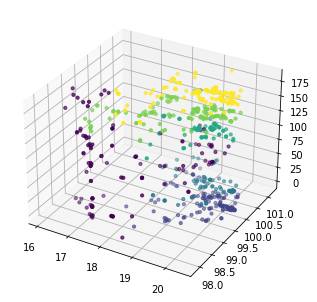

In [181]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lat7[:,0], lat7[:,1], lat7[:,2], c=dblabels, s=10)
#ax.view_init(azim=200)
plt.show()

In [182]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(lat7, dblabels)

0.7102974215549793

จากการจัดลุ่มข้อมูลโดยใช้เทคนิค DBSCAN (Density Based) กำหนดค่าดังนี้ 1. eps =  1 เนื่องจากแกน x,y มี range ค่อนข้างแคบ ถ้ากำหนดมากเกินไปค่า difference ระหว่างช่วงจะไม่สัมพันธ์กับค่า days ซึ่งเปลี่ยนเป็นเวลา timediff แบบชั่วโมง 2. minPoints : /0 จะเห็นว่าจากการจัดกลุ่มได้ค่า Silhoulette score = 0.7102974215549793 ซึ่งมีค่าเข้าใกล้ 1 หมายความว่าแบบจำลองค่อนข้างดี จัดกลุ่มได้ค่อนข้างเหมาะสมกับข้อมูล แต่ก็ยังมีข้อมูลบางส่วนที่กระจายตัวค่อนข้างห่างกันจึงไม่ได้รับการจัดกลุ่ม ซึ่งถูกถือว่าเป็น outliers ในรูปก็คือกลุ่มจุดที่เป็นสีม่วง